In [ ]:
import os
import csv
import pandas as pd

# Dependencies for Weather
import requests as req
import openweathermapy.core as owm
from citipy import citipy

#Dependencies for random coordinates
import random
from random import uniform

#Dependencies for Df and Analysis
import numpy as np

#Dependencies for Plots
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#Dependencies for api key
from config import api_key


InputFile = 'CITES_Results1617_JRE.csv'
ImporterFile = 'Top10ImpByTrans_JRE.csv'
ExporterFile = 'Top10ExpByTrans_JRE.csv'
ImpQtyFile = 'Top10ImpByQuantity_JRE.csv'
ExpQtyFile = 'Top10ExpByQuantity_JRE.csv'
LatLonFile = 'country_lat_lon.xlsx'


In [2]:
csvpath = os.path.join(InputFile)
input_df = pd.read_csv(csvpath)
print(input_df.columns.get_values())
input_df.head(1)


['Year' 'App.' 'Taxon' 'Class' 'Order' 'Family' 'Genus' 'Importer'
 'Exporter' 'Origin' 'Importer reported quantity'
 'Exporter reported quantity' 'Term' 'Unit' 'Purpose' 'Source'
 'Purpose Description' 'Source Description' 'Importer Country Name'
 'Exporter Country Name']


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name,Exporter Country Name
0,2016,I,Aquila heliaca,Aves,Falconiformes,Accipitridae,Aquila,TR,NL,CZ,NaN,1.0,bodies,NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands


In [3]:
latlonfile_df = pd.read_excel(LatLonFile)
latlonfile_df.head(1)

,Country,Lattitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra


In [4]:
print(input_df.loc[input_df["Class"]=="Reptilia"])
TopImporter_croc_df = pd.DataFrame(input_df.loc[input_df["Class"]=="Reptilia"])

       Year App.                             Taxon     Class       Order  \
3      2016   II                 Caiman crocodilus  Reptilia  Crocodylia   
4      2016   II          Caiman crocodilus fuscus  Reptilia  Crocodylia   
5      2016   II              Crocodylus niloticus  Reptilia  Crocodylia   
7      2016   II                 Python bivittatus  Reptilia   Serpentes   
8      2016   II                 Python bivittatus  Reptilia   Serpentes   
10     2016    I              Crocodylus niloticus  Reptilia  Crocodylia   
11     2016   II        Alligator mississippiensis  Reptilia  Crocodylia   
12     2016   II              Crocodylus niloticus  Reptilia  Crocodylia   
13     2016   II                Python brongersmai  Reptilia   Serpentes   
14     2016   II                Python reticulatus  Reptilia   Serpentes   
15     2016   II                 Salvator merianae  Reptilia      Sauria   
16     2016   II                  Varanus salvator  Reptilia      Sauria   
17     2016 

In [5]:
#print(TopImporter_croc_df.head())
# Group by Importing country
# Using GroupBy in order to summarize the data by 'Importer Country Name' values
#GrpdByImporterData = input_df.groupby(['Importer Country Name'])
#GrpdByImporterData = TopImporter_croc_df.groupby(['Importer Country Name'])
GrpdByImporterData = TopImporter_croc_df.groupby(['Importer'])

# Transaction count
#ImportTransactionCount = TopImporter_croc_df['Importer Country Name'].value_counts()

# Transaction count
ImportTransactionCount = TopImporter_croc_df['Importer'].value_counts()


# Construct the output table
# In order to be visualized, a data function must be used...
TopImporter_df = pd.DataFrame({'Transaction Count': ImportTransactionCount})
# convert the index into a column
TopImporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopImporter_df.reset_index(inplace=True)
TopImporter_df = TopImporter_df.rename(columns = {'index' : 'Import Country'})
TopImporter_df.to_csv(ImporterFile, encoding='utf-8', index=False)
TopImporter_df.head(10)




,Import Country,Transaction Count
0,US,2601
1,JP,1320
2,HK,1047
3,CN,815
4,FR,744
5,CH,716
6,IT,628
7,KR,593
8,SG,509
9,DE,488


In [6]:
TopImporter_df.head(10)


,Import Country,Transaction Count
0,US,2601
1,JP,1320
2,HK,1047
3,CN,815
4,FR,744
5,CH,716
6,IT,628
7,KR,593
8,SG,509
9,DE,488


In [7]:
latlonfile_df.head(1)

,Country,Lattitude,Longitude,Name
0,AD,42.546245,1.601554,Andorra


In [8]:
TopImporter_df["Import Country"]
latlonfile_df["Country"]
TopImporter_df = TopImporter_df.merge(latlonfile_df, left_on='Import Country', right_on='Country', how='inner')
TopImporter_df.head(10)


,Import Country,Transaction Count,Country,Lattitude,Longitude,Name
0,US,2601,US,37.090240,-95.712891,United States
1,JP,1320,JP,36.204824,138.252924,Japan
2,HK,1047,HK,22.396428,114.109497,Hong Kong
3,CN,815,CN,35.861660,104.195397,China
4,FR,744,FR,46.227638,2.213749,France
5,CH,716,CH,46.818188,8.227512,Switzerland
6,IT,628,IT,41.871940,12.567380,Italy
7,KR,593,KR,35.907757,127.766922,South Korea
8,SG,509,SG,1.352083,103.819836,Singapore
9,DE,488,DE,51.165691,10.451526,Germany


In [9]:
TopImporter_croc_df.head()


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name,Exporter Country Name
3,2016,II,Caiman crocodilus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
4,2016,II,Caiman crocodilus fuscus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,NaN,5.0,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
5,2016,II,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,TR,NL,ZA,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
7,2016,II,Python bivittatus,Reptilia,Serpentes,Pythonidae,Python,TR,NL,VN,25.0,33.0,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
8,2016,II,Python bivittatus,Reptilia,Serpentes,Pythonidae,Python,TR,NL,NaN,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands


In [10]:
# Group by Exporting Countries
TopExporter_croc_df = pd.DataFrame(input_df.loc[input_df["Class"]=="Reptilia"])

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
#GrpdByExporterData = TopExporter_croc_df.groupby(['Exporter Country Name'])
GrpdByExporterData = TopExporter_croc_df.groupby(['Exporter'])

# Transaction count
#ExportTransactionCount = TopExporter_croc_df['Exporter Country Name'].value_counts()
ExportTransactionCount = TopExporter_croc_df['Exporter'].value_counts()

# Construct the output table
# In order to be visualized, a data function must be used...
TopExporter_df = pd.DataFrame({'Transaction Count': ExportTransactionCount})
# convert the index into a column
TopExporter_df.sort_values("Transaction Count", inplace=True, ascending=False)
TopExporter_df.reset_index(inplace=True)
TopExporter_df = TopExporter_df.rename(columns = {'index' : 'Export Country'})
TopExporter_df.to_csv(ExporterFile, encoding='utf-8', index=False)
TopExporter_df.head(3)
TopExporter_croc_df.head()


,Year,App.,Taxon,Class,Order,Family,Genus,Importer,Exporter,Origin,Importer reported quantity,Exporter reported quantity,Term,Unit,Purpose,Source,Purpose Description,Source Description,Importer Country Name,Exporter Country Name
3,2016,II,Caiman crocodilus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
4,2016,II,Caiman crocodilus fuscus,Reptilia,Crocodylia,Alligatoridae,Caiman,TR,NL,CO,NaN,5.0,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
5,2016,II,Crocodylus niloticus,Reptilia,Crocodylia,Crocodylidae,Crocodylus,TR,NL,ZA,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
7,2016,II,Python bivittatus,Reptilia,Serpentes,Pythonidae,Python,TR,NL,VN,25.0,33.0,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands
8,2016,II,Python bivittatus,Reptilia,Serpentes,Pythonidae,Python,TR,NL,NaN,1.0,NaN,leather products (small),NaN,T,C,Commercial,Animals bred in captivity in accordance with R...,Turkey,Netherlands


In [11]:
#TopExporter_df.head(10)
#TopExporter_df["Export Country"]
#latlonfile_df["Country"]
TopExporter_df = TopExporter_df.merge(latlonfile_df, left_on='Export Country', right_on='Country', how='inner')
TopExporter_df.head(10)


,Export Country,Transaction Count,Country,Lattitude,Longitude,Name
0,IT,3961,IT,41.871940,12.567380,Italy
1,FR,2026,FR,46.227638,2.213749,France
2,US,1143,US,37.090240,-95.712891,United States
3,CH,884,CH,46.818188,8.227512,Switzerland
4,SG,880,SG,1.352083,103.819836,Singapore
5,DE,840,DE,51.165691,10.451526,Germany
6,ID,824,ID,-0.789275,113.921327,Indonesia
7,HK,616,HK,22.396428,114.109497,Hong Kong
8,GB,497,GB,55.378051,-3.435973,United Kingdom
9,ES,445,ES,40.463667,-3.749220,Spain


In [12]:
TopImporter_croc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17910 entries, 3 to 60626
Data columns (total 20 columns):
Year                          17910 non-null int64
App.                          17910 non-null object
Taxon                         17910 non-null object
Class                         17910 non-null object
Order                         17906 non-null object
Family                        17883 non-null object
Genus                         17754 non-null object
Importer                      17898 non-null object
Exporter                      17885 non-null object
Origin                        13866 non-null object
Importer reported quantity    8439 non-null float64
Exporter reported quantity    12754 non-null float64
Term                          17910 non-null object
Unit                          212 non-null object
Purpose                       17910 non-null object
Source                        17910 non-null object
Purpose Description           17910 non-null object
Source De

In [13]:
# Top Importer by Importer reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByImpQtyData = TopExporter_croc_df.groupby(['Importer Country Name'])

# Transaction count
ImportTransCount = TopExporter_croc_df['Importer Country Name'].value_counts()
ImportRptdQuantity = GrpdByImpQtyData['Importer reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopImpQty_df = pd.DataFrame({'Transaction Count': ImportTransCount,
                            'Quantity Imported': ImportRptdQuantity })

# sort and convert the index into a column
TopImpQty_df.sort_values("Quantity Imported", inplace=True, ascending=False)
TopImpQty_df.reset_index(inplace=True)
TopImpQty_df = TopImpQty_df.rename(columns = {'index' : 'Import Country'})
TopImpQty_df.to_csv(ImpQtyFile, encoding='utf-8', index=False)
TopImpQty_df.head(3)


,Import Country,Quantity Imported,Transaction Count
0,"Hong Kong, SAR China",2017551.93,1047
1,United States of America,1382983.59,2601
2,France,1118549.31,744


In [14]:
# Top Importer by Exporter reported quantities

# Using GroupBy in order to summarize the data by 'Importer Country Name' values
GrpdByExpQtyData = TopExporter_croc_df.groupby(['Exporter Country Name'])

# Transaction count
ExportTransCount = TopExporter_croc_df['Exporter Country Name'].value_counts()
ExportRptdQuantity = GrpdByExpQtyData['Exporter reported quantity'].sum()
# Construct the output table
# In order to be visualized, a data function must be used...
TopExpQty_df = pd.DataFrame({'Transaction Count': ExportTransCount,
                            'Quantity Exported': ExportRptdQuantity })

# convert the index into a column
TopExpQty_df.sort_values("Quantity Exported", inplace=True, ascending=False)
TopExpQty_df.reset_index(inplace=True)
TopExpQty_df = TopExpQty_df.rename(columns = {'index' : 'Export Country'})
TopExpQty_df.to_csv(ExpQtyFile, encoding='utf-8', index=False)
TopExpQty_df.head(3)


,Export Country,Quantity Exported,Transaction Count
0,France,1.616457e+06,2026
1,United States of America,1.390884e+06,1143
2,Italy,1.208306e+06,3961


In [15]:
TopTenExporter_df = pd.DataFrame(TopExporter_df["Transaction Count"].nlargest(10))
TopTenExporter_df.head()
TopTenExporter_df

TopTenExporter_df = TopTenExporter_df.merge(TopExporter_df, left_on='Transaction Count', right_on='Transaction Count', how='left')
TopTenExporter_df.head(10)


,Transaction Count,Export Country,Country,Lattitude,Longitude,Name
0,3961,IT,IT,41.871940,12.567380,Italy
1,2026,FR,FR,46.227638,2.213749,France
2,1143,US,US,37.090240,-95.712891,United States
3,884,CH,CH,46.818188,8.227512,Switzerland
4,880,SG,SG,1.352083,103.819836,Singapore
5,840,DE,DE,51.165691,10.451526,Germany
6,824,ID,ID,-0.789275,113.921327,Indonesia
7,616,HK,HK,22.396428,114.109497,Hong Kong
8,497,GB,GB,55.378051,-3.435973,United Kingdom
9,445,ES,ES,40.463667,-3.749220,Spain


In [16]:
TopTenImporter_df = pd.DataFrame(TopImporter_df["Transaction Count"].nlargest(10))
TopTenImporter_df.head()
TopTenImporter_df

TopTenImporter_df = TopTenImporter_df.merge(TopImporter_df, left_on='Transaction Count', right_on='Transaction Count', how='left')
print(TopTenImporter_df.head(10))
TopTenExporter_df.head(10)


   Transaction Count Import Country Country  Lattitude   Longitude  \
0               2601             US      US  37.090240  -95.712891   
1               1320             JP      JP  36.204824  138.252924   
2               1047             HK      HK  22.396428  114.109497   
3                815             CN      CN  35.861660  104.195397   
4                744             FR      FR  46.227638    2.213749   
5                716             CH      CH  46.818188    8.227512   
6                628             IT      IT  41.871940   12.567380   
7                593             KR      KR  35.907757  127.766922   
8                509             SG      SG   1.352083  103.819836   
9                488             DE      DE  51.165691   10.451526   

            Name  
0  United States  
1          Japan  
2      Hong Kong  
3          China  
4         France  
5    Switzerland  
6          Italy  
7    South Korea  
8      Singapore  
9        Germany  


,Transaction Count,Export Country,Country,Lattitude,Longitude,Name
0,3961,IT,IT,41.871940,12.567380,Italy
1,2026,FR,FR,46.227638,2.213749,France
2,1143,US,US,37.090240,-95.712891,United States
3,884,CH,CH,46.818188,8.227512,Switzerland
4,880,SG,SG,1.352083,103.819836,Singapore
5,840,DE,DE,51.165691,10.451526,Germany
6,824,ID,ID,-0.789275,113.921327,Indonesia
7,616,HK,HK,22.396428,114.109497,Hong Kong
8,497,GB,GB,55.378051,-3.435973,United Kingdom
9,445,ES,ES,40.463667,-3.749220,Spain


In [17]:
#Rename the coordenates list for TopExporters
### populate latitude and longitude using coordinates from the Country 
latitude = TopTenExporter_df["Lattitude"]
longitude = TopTenExporter_df["Longitude"]

In [18]:
#Generate city names for the lat and long coordenates above
city_names = []
for x in range(0,len(TopTenExporter_df)):
    city_name = citipy.nearest_city(latitude[x],longitude[x])
    city_names.append(city_name)
#city_names

#Generate the city and country lists 
city_list = []
for x in range(0,len(TopTenExporter_df)):
    city = city_names[x].city_name
    #print(city_names[x].city_name)
    city_list.append(city)

country_list = []
for y in range(0,len(TopTenExporter_df)):
    country = city_names[y].country_code
    #print(city_names[y].country_code)
    country_list.append(country)

#Generate Dataframe
location_df = pd.DataFrame()

location_df["Latitude"] = ""
location_df["Longitude"] = ""
location_df['City'] = ''
location_df['Country Code'] = ''
location_df = location_df.append(pd.DataFrame.from_dict({"Latitude":latitude,"Longitude":longitude,"City":city_list,"Country Code":country_list,}))
location_df = location_df.reset_index(drop=True)
location_df.shape
#location_df

#Clean the data, drop the duplicated citites and reindex
drop_location_df = location_df.drop_duplicates(['City'])
drop_location_df.shape
new_location_df = drop_location_df#.sample(sample)
city_coordinates_df = new_location_df.reset_index(drop=True)

#See the random coordenates in the map for the nearest cities:
#import cartopy.crs as ccrs

#fig, ax = plt.subplots(figsize = (20,10))

#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img()

#plt.scatter(list(city_coordinates_df['Longitude']),list(city_coordinates_df['Latitude']), color='red', marker = 'x', transform = ccrs.Geodetic(),)

#plt.title('Distribution of Countries')
#plt.savefig('DistributionOfCountries')
#plt.show()

In [23]:
#print(TopTenImporter_df.head())
#Rename the coordenates list for TopExporters
### populate latitude and longitude using coordinates from the Country 
import_latitude = TopTenImporter_df["Lattitude"]
import_longitude = TopTenImporter_df["Longitude"]
print(TopTenImporter_df.head())

   Transaction Count Import Country Country  Lattitude   Longitude  \
0               2601             US      US  37.090240  -95.712891   
1               1320             JP      JP  36.204824  138.252924   
2               1047             HK      HK  22.396428  114.109497   
3                815             CN      CN  35.861660  104.195397   
4                744             FR      FR  46.227638    2.213749   

            Name  
0  United States  
1          Japan  
2      Hong Kong  
3          China  
4         France  


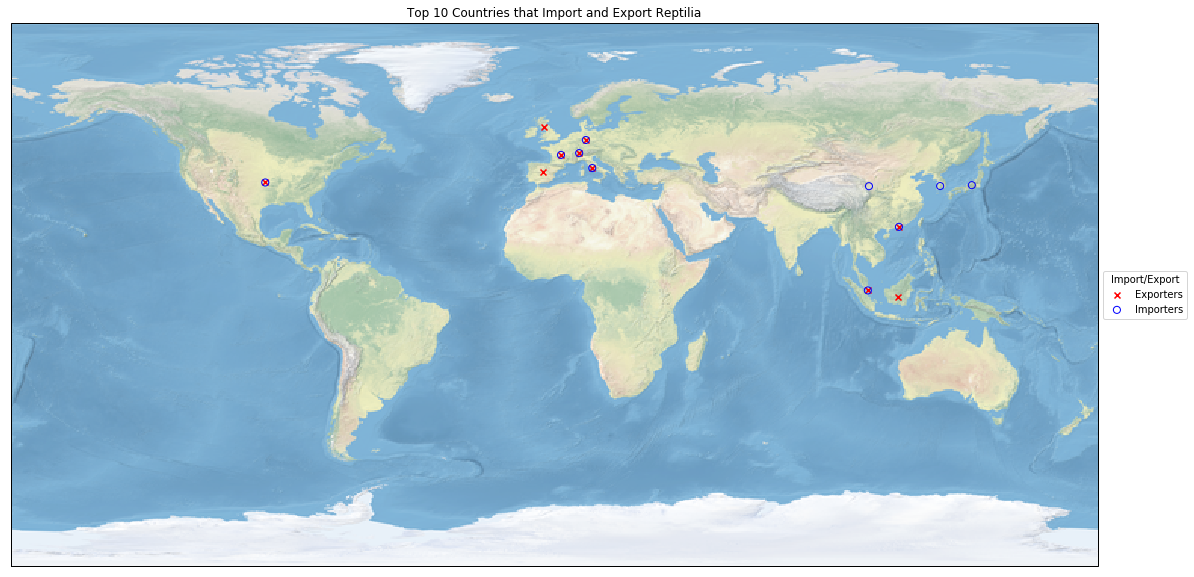

In [24]:
#Generate city names for the lat and long coordenates above
import_city_names = []
for x in range(0,len(TopTenImporter_df)):
    import_city_name = citipy.nearest_city(import_latitude[x],import_longitude[x])
    import_city_names.append(import_city_name)
    #print(import_latitude[x])
#city_names
#print(import_city_names)   
    
#Generate the city and country lists 
import_city_list = []
for x in range(0,len(TopTenImporter_df)):
    import_city = import_city_names[x].city_name
    #print(import_city_names[x].city_name)
    import_city_list.append(import_city)
#print(import_city_list)

import_country_list = []
for y in range(0,len(TopTenImporter_df)):
    import_country = import_city_names[y].country_code
    #print(city_names[y].country_code)
    import_country_list.append(import_country)
#print(import_country_list)

#Generate Dataframe
import_location_df = pd.DataFrame()

import_location_df["Latitude"] = ""
import_location_df["Longitude"] = ""
import_location_df['City'] = ''
import_location_df['Country Code'] = ''
import_location_df = import_location_df.append(pd.DataFrame.from_dict({"Latitude":import_latitude,"Longitude":import_longitude,"City":import_city_list,"Country Code":import_country_list,}))
import_location_df = import_location_df.reset_index(drop=True)
import_location_df.shape
#location_df
#print(import_location_df.head())

#Clean the data, drop the duplicated citites and reindex
import_drop_location_df = import_location_df.drop_duplicates(['City'])
import_drop_location_df.shape
import_new_location_df = import_drop_location_df#.sample(sample)
import_city_coordinates_df = import_new_location_df.reset_index(drop=True)

#print(import_city_coordinates_df.head(10))
#See the random coordenates in the map for the nearest cities:
import cartopy.crs as ccrs

fig, ax = plt.subplots(figsize = (20,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

exporters = plt.scatter(list(city_coordinates_df['Longitude']),list(city_coordinates_df['Latitude']), color='red', marker = 'x', label = "Exporters", transform = ccrs.Geodetic(),)
importers = plt.scatter(list(import_city_coordinates_df['Longitude']),list(import_city_coordinates_df['Latitude']),s=50,facecolors='none', edgecolors = 'blue', marker = 'o', label = "Importers", transform = ccrs.Geodetic(),)

#lt.scatter(x, y, s=80, facecolors='none', edgecolors='r')

plt.title('Top 10 Countries that Import and Export Reptilia')
# Put a legend to the right of the current axis

ax.legend(handles=[exporters,importers], title = "Import/Export", loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig('Top10ImportExportCountries')
plt.show()